# Álgebra Lineal
<img src="https://asm86.files.wordpress.com/2011/10/matv.jpg">

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Modulo para resolver ecuaciones diferenciales ordinarias.
from scipy.integrate import odeint

# Importar la biblioteca de álgebra lineal de scipy
from scipy import linalg as la

## Operaciones de matrices y vectores

Si A y B son dos matrices que se definien de la siguiente forma:

In [2]:
A = np.array([[3, 6, 2], [-4, 6, 1], [8, -2, 3]])
B = np.array([[4, 7, 1], [3, 4, 8], [9, 5, 6]])

La suma se realiza con en operador +.

In [3]:
A + B

array([[ 7, 13,  3],
       [-1, 10,  9],
       [17,  3,  9]])

En el caso de la multiplicación entre matrices **NO** se utiliza el operador ```*```. El mismo lo que efectúa es una multiplicación entre **```ndarray``` no entre matrices** por lo que resultará en $c_ij = a_{ij}*b_{ij}$.

Para multiplicar matrices se utiliza la función ```np.matmul``` o el operador especial ```@``` de la siguiente forma:

In [ ]:
print("Multiplicación entre ndarrays:\n", A * B)
print("Multiplicación entre matrices:\n", A @ B)
print("O también\n", np.matmul(A, B))

Multiplicación entre ndarrays:
 [[ 12  42   2]
 [-12  24   8]
 [ 72 -10  18]]
Multiplicación entre matrices:
 [[48 55 63]
 [11  1 50]
 [53 63 10]]
O también
 [[48 55 63]
 [11  1 50]
 [53 63 10]]


Pero además la multiplicación se pudiera expresar directamente como un producto interno usando la función ```np.dot``` de la cual hablaremos seguidamente.

Sean las siguientes matrices A y B representadas en ```ndarrays```:

In [ ]:
A = np.arange(1, 7).reshape(2, 3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
B = np.arange(1, 7).reshape(3, 2)
B

array([[1, 2],
       [3, 4],
       [5, 6]])

El producto **dot** entre dos matrices $A_{M \times P}$ y $B_{P \times N}$ se define como $(A \bullet B)_{M \times N} = \sum_{r=1}^P a_{ir} b_{rj}$. Para ello se utiliza la función ```numpy.dot```.

In [4]:
np.dot(A, B)

array([[48, 55, 63],
       [11,  1, 50],
       [53, 63, 10]])

In [5]:
np.dot(B, A)

array([[-8, 64, 18],
       [57, 26, 34],
       [55, 72, 41]])

En el caso del producto **dot** entre una matriz y un vector $A_{M \times N} \bullet \vec{v}_{N} = \sum_{r=1}^N a_{ir} \vec{v}_r, \, ∀ i = 1, \dots, M$ se puede implementar de la siguiente forma:

In [ ]:
v = np.arange(3)
v

array([0, 1, 2])

In [ ]:
np.dot(A, v)

array([ 8, 17])

También la función ```numpy.dot``` pudiera ser llamada desde la propia instancia del objeto ```ndarray``` de la siguiente forma:

In [ ]:
A.dot(v)

array([ 8, 17])

La función ```numpy.inner``` no es más que la implementación del producto interno entre dos vetores. Esta función está implícita en la función ```numpy.dot```.

In [6]:
np.flip?

Signature:       np.flip(m, axis=None)
Call signature:  np.flip(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function flip at 0x7fc7d866fb00>
File:            /usr/lib/python3.11/site-packages/numpy/lib/function_base.py
Docstring:      
Reverse the order of elements in an array along the given axis.

The shape of the array is preserved, but the elements are reordered.

.. versionadded:: 1.12.0

Parameters
----------
m : array_like
    Input array.
axis : None or int or tuple of ints, optional
     Axis or axes along which to flip over. The default,
     axis=None, will flip over all of the axes of the input array.
     If axis is negative it counts from the last to the first axis.

     If axis is a tuple of ints, flipping is performed on all of the axes
     specified in the tuple.

     .. versionchanged:: 1.15.0
        None and tuples of axes are supported

Returns
-------
out : array_like
    A view of `m` with the entries of axis reversed.  Since a

In [ ]:
u = np.flip(v)
np.inner(v, u)

1

El **producto externo** entre dos vectores se define como $x_{M} \bigotimes y_{N} = C_{M\times N}$ tal que $c_{i, j} = x_{i} * y_{j}, \, i=1, \dots, M; j=1, \dots, N$.

In [ ]:
x = np.array([1, 2])
y = np.array([3, 2])

np.outer(x, y)

array([[3, 2],
       [6, 4]])

El [producto de kronecker](https://es.wikipedia.org/wiki/Producto_de_Kronecker) entre dos matrices se obtiene a través de la funció ```numpy.kron``` y retorna como resultado una matriz de bloques como sigue:

In [7]:
np.kron?

Signature:       np.kron(a, b)
Call signature:  np.kron(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function kron at 0x7fc7d868f560>
File:            /usr/lib/python3.11/site-packages/numpy/lib/shape_base.py
Docstring:      
Kronecker product of two arrays.

Computes the Kronecker product, a composite array made of blocks of the
second array scaled by the first.

Parameters
----------
a, b : array_like

Returns
-------
out : ndarray

See Also
--------
outer : The outer product

Notes
-----
The function assumes that the number of dimensions of `a` and `b`
are the same, if necessary prepending the smallest with ones.
If ``a.shape = (r0,r1,..,rN)`` and ``b.shape = (s0,s1,...,sN)``,
the Kronecker product has shape ``(r0*s0, r1*s1, ..., rN*SN)``.
The elements are products of elements from `a` and `b`, organized
explicitly by::

    kron(a,b)[k0,k1,...,kN] = a[i0,i1,...,iN] * b[j0,j1,...,jN]

where::

    kt = it * st + jt,  t = 0,...,N

In the common 2-D cas

In [ ]:
# Matriz de discretización del operador diferencial de la ecuación de Laplace
A = np.array([[4, 1], [1, 4]])
# Matriz identidad
I = np.eye(A.shape[0] * 3)

# Producto Kronecker
print("Matriz A\n", A)
print("Matriz I\n", I)
print("Producto Kronecker $I \\bigotimes A$\n", np.kron(I, A))

Matriz A
 [[4 1]
 [1 4]]
Matriz I
 [[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]
Producto Kronecker $I \bigotimes A$
 [[4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 4. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 4. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 4. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 4. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 4.]]


Para calcular la inversa de una matriz se puede utilizar la función ```inv``` que está implementada tanto en ```numpy.linalg.inv``` como en ```scipy.linalg.inv```.

In [ ]:
A = np.array([[1, -1], [2, 4]])
Ap = np.linalg.inv(A)
print("A=\n", A)
print("A' A=\n", np.dot(Ap, A))
print("A' A ~=\n", np.rint(np.dot(Ap, A)))

A=
 [[ 1 -1]
 [ 2  4]]
A' A=
 [[1.00000000e+00 1.11022302e-16]
 [0.00000000e+00 1.00000000e+00]]
A' A ~=
 [[1. 0.]
 [0. 1.]]


In [ ]:
Ap = la.inv(A)
print("A' A ~=\n", np.rint(np.dot(Ap, A)))

A' A ~=
 [[1. 0.]
 [0. 1.]]


Veamos el siguiente **ejemplo**: 

Supongamos que tenemos $A_{M \times N}$, $\Lambda_{M \times N}$ y $B_{M \times N}$


In [ ]:
A = np.array([[1, -1], [2, 4]])
B = np.array([[-0.5, 1.0 / 3.0], [0.5, -2.0 / 3.0]])
L = np.diag([2.0, 3.0])

print("A=\n", A)
print("B=\n", np.round(B, 1))
print("L=\n", L)

A=
 [[ 1 -1]
 [ 2  4]]
B=
 [[-0.5  0.3]
 [ 0.5 -0.7]]
L=
 [[2. 0.]
 [0. 3.]]


y se desea realizar la siguiente operación:

$B \Lambda B^{-1} = A$

¿Cómo se pudiera realizar en una sola línea de código?


In [ ]:
print("B L B' = A =\n", np.matmul(B, np.matmul(L, la.inv(B))))

B L B' = A =
 [[ 1. -1.]
 [ 2.  4.]]


O utilizando el producto **dot** se puede plantear

In [ ]:
print("B L B' = A =\n", np.dot(B, np.dot(L, la.inv(B))))

B L B' = A =
 [[ 1. -1.]
 [ 2.  4.]]


O utilizamos el símbolo ```@```:

In [ ]:
print("B L B' = A =\n", B @ L @ la.inv(B))

B L B' = A =
 [[ 1. -1.]
 [ 2.  4.]]


### El tipo Matrix

Las operaciones que realizamos en la sección anterior son todavía un poco extensas porque son en realidad operaciones entre ndArrays. Por tal motivo, en el módulo ```numpy``` existe una clase llamda ```matrix``` la cual encapsula las propiedades y comportamientos de una matriz.

Con esta clase es posible hacer operaciones como estas:

In [ ]:
A_ = np.matrix(A)
B_ = np.matrix(B)
L_ = np.matrix(L)

Ap_ = B_ * L_ * B_.I

print(Ap_)

[[ 1. -1.]
 [ 2.  4.]]


de donde ```B.I``` calcula directamente la inversa de la matriz ```B```.

También es posible hacer la transformación de la siguiente forma:

In [ ]:
A_ = np.asmatrix(A)
print("Tipo de A_:", type(A_))
print("Tipo de A:", type(A))

Tipo de A_: <class 'numpy.matrix'>
Tipo de A: <class 'numpy.ndarray'>


Y de igual manera se puede transformar de una ```matrix``` a un ```ndarray```.

In [ ]:
Ap = np.asarray(Ap_)
print(Ap)
print("Tipo de Ap:", type(Ap))

[[ 1. -1.]
 [ 2.  4.]]
Tipo de Ap: <class 'numpy.ndarray'>


## Sistemas de ecuaciones

### Sistemas de ecuaciones cuadrados

La resolución del problema:

$Ax=b$.

### El módulo SymPy

Este módulo de python permite hacer cálculo simbólico lo cual es útil en muchos de los escenarios. Veremos algunos de sus usos en el álgebra lineal y concretamente en la resolución de sistemas de ecuaciones cuadrados.

In [ ]:
import sympy

sympy.init_printing()  # Para imprimir los resultados de forma más estética

Creemos la matriz $\begin{bmatrix}
2 & 3\\
5 & 4
\end{bmatrix}$ utilizando el módulo sympy

In [ ]:
A = sympy.Matrix([[2, 3], [5, 4]])
print("A=\n", A)
print("Tipo de A:", type(A))

A=
 Matrix([[2, 3], [5, 4]])
Tipo de A: <class 'sympy.matrices.dense.MutableDenseMatrix'>


In [ ]:
A

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

El **rango de una matriz** A indica la cantidad de vectores fila o columna linealmente independiente que forman parte de la matriz. 

Si el rango no coincide con la dimensión de la matriz cuadrada A entonces se dice que tiene rango deficiente y la solución del sistema ya no será única en caso de tener.

In [ ]:
A.rank()

Por otra parte, la **condición de la matriz** permite saber si el problema es bien-planteado o no y así decidir cuáles son los mejores métodos a utilizar para su resolución.  

$cond(a) ≡ ||A^{-1}||\bullet ||A||$.

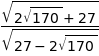

In [ ]:
A.condition_number()

Claro que el número de condición anterior está dado de forma simbólica porque así es calculado por ```sympy```. Para evaluarlo se usa

In [ ]:
sympy.N(A.condition_number())

Si hablamos de la norma que ```sympy``` implementa por defecto es la norma de Frobenius

$||A||_{F} = \sqrt{\sum_{i,j} |a_{ij}|^2 }$.

In [ ]:
A.norm()

Para calcular otras normas usar el parámetro ```ord```:

In [ ]:
sympy.N(A.norm(2))

Tambien permite el cálculo de determinante

In [ ]:
sympy.det(A)

In [ ]:
A.det()

También es muy útil la función ```sympy.nullspace``` la cual devuelve el espacio nulo de la matriz:

El espacio no trivial en el cual $∀ x : A x = \vec{0}$.

In [ ]:
A = sympy.Matrix(np.array([[1, -1], [2, 4]]))
A

⎡1  -1⎤
⎢     ⎥
⎣2  4 ⎦

Calcular $(A - 2 I) x = \vec{0}$

In [ ]:
M = A - sympy.Matrix(np.diag([2.0, 2.0]))
M

⎡-1.0  -1 ⎤
⎢         ⎥
⎣ 2    2.0⎦

In [ ]:
M.nullspace()

⎡⎡-1.0⎤⎤
⎢⎢    ⎥⎥
⎣⎣ 1  ⎦⎦

Y también $(A - 3 I) x = \vec{0}$

In [ ]:
M = A - sympy.Matrix(np.diag([3.0, 3.0]))
M

⎡-2.0  -1 ⎤
⎢         ⎥
⎣ 2    1.0⎦

In [ ]:
M.nullspace()

⎡⎡-0.5⎤⎤
⎢⎢    ⎥⎥
⎣⎣ 1  ⎦⎦

Más adelante veremos que son los valores y vectores propios de $A$.

#### Descomposiciones de matrices y Cálculo simbólico

Factorización $A = L U$. Esta descomposición de una matriz $A_{M\times N}$ está definida como $PA=LU$, donde la $P$ es una matriz de permutaciones, $L$ una matriz triangular inferior (ceros por encima de la diagonal, unos en la diagonal y distinto de cero debajo de la diagonal) y $U$ es una matriz triangular superior (ceros debajo de la diagonal). 

Estas matrices son calculadas en el prioceso de eliminación de Gauss. La descomposición $L U$ se calcula reduciendo la matriz $A$ a una matriz triangular superior.

Veamos como se puede realizar esta descomposición utilizando ```sympy```:

In [ ]:
A = sympy.Matrix([[4, 4, 8], [2, 8, 7], [1, 3, 6]])
A

⎡4  4  8⎤
⎢       ⎥
⎢2  8  7⎥
⎢       ⎥
⎣1  3  6⎦

In [ ]:
A.LUdecomposition()

⎛⎡ 1    0   0⎤  ⎡4  4  8⎤    ⎞
⎜⎢           ⎥  ⎢       ⎥    ⎟
⎜⎢1/2   1   0⎥, ⎢0  6  3⎥, []⎟
⎜⎢           ⎥  ⎢       ⎥    ⎟
⎝⎣1/4  1/3  1⎦  ⎣0  0  3⎦    ⎠

De esta forma se obtiene $\left(L, U, P\right)$. En este caso no fue necesario ning[un intercambio de ecuaciones por lo que la matriz $P$ está vacía.

In [ ]:
L, U, P = A.LUdecomposition()

In [ ]:
L * U

⎡4  4  8⎤
⎢       ⎥
⎢2  8  7⎥
⎢       ⎥
⎣1  3  6⎦

Si lo que se necesita es resolver el sistema entonces se pueden usar las siguientes variantes

In [ ]:
b = sympy.Matrix([[1], [2], [1]])
b

⎡1⎤
⎢ ⎥
⎢2⎥
⎢ ⎥
⎣1⎦

In [ ]:
A.solve(b)

⎡-1/8⎤
⎢    ⎥
⎢5/24⎥
⎢    ⎥
⎣1/12⎦

O lo que sería lo mismo

In [ ]:
A.LUsolve(b)

⎡-1/8⎤
⎢    ⎥
⎢5/24⎥
⎢    ⎥
⎣1/12⎦

Evaluando la expresión anterior se obtiene:

In [ ]:
sympy.N(_)

⎡      -0.125      ⎤
⎢                  ⎥
⎢0.208333333333333 ⎥
⎢                  ⎥
⎣0.0833333333333333⎦

La factorización $A = L L^T$ es un caso especial de la $A = LU$. En este caso se explota el hecho que la matriz sea real simétrica y definida positiva para aplicar la descomposición de Cholesky.

La matriz $L$ sigue siendo la matriz triangular inferior pero en este caso la matriz $U$ es igual a la transpuesta de $L$. También está el caso de que $LDL^T$ donde $D$ es una matriz diagonal.

In [ ]:
A = sympy.Matrix([[10, 2, 1], [2, 1, -2], [1, -2, 10]])
A

⎡10  2   1 ⎤
⎢          ⎥
⎢2   1   -2⎥
⎢          ⎥
⎣1   -2  10⎦

La matriz A es claramente simétrica. ¿Pero será definida positiva? 

Para saberlo calculemos sus valores propios los cuales son reales y positivos en caso de que la matriz sea definida positiva.

In [ ]:
A.eigenvals()

Cumpliéndose las condiciones podemos proceder a calcular la descomposición de Cholesky:

In [ ]:
L = A.cholesky()

In [ ]:
L

⎡√10     0       0 ⎤
⎢                  ⎥
⎢√10    √15        ⎥
⎢───    ───      0 ⎥
⎢ 5      5         ⎥
⎢                  ⎥
⎢√10  -11⋅√15   √66⎥
⎢───  ────────  ───⎥
⎣ 10     15      6 ⎦

In [ ]:
L.T

⎡     √10    √10   ⎤
⎢√10  ───    ───   ⎥
⎢      5      10   ⎥
⎢                  ⎥
⎢     √15  -11⋅√15 ⎥
⎢ 0   ───  ────────⎥
⎢      5      15   ⎥
⎢                  ⎥
⎢            √66   ⎥
⎢ 0    0     ───   ⎥
⎣             6    ⎦

In [ ]:
L * L.T

⎡10  2   1 ⎤
⎢          ⎥
⎢2   1   -2⎥
⎢          ⎥
⎣1   -2  10⎦

### El módulo linalg de NumPy y SciPy

Veamos cómo hacer las descomposiciones anteriores usando el módulo ```linalg``` de ```numpy``` y ```scipy```.

Descomposición $PA=LU$:

In [ ]:
A = np.array([[4, 4, 8], [2, 8, 7], [1, 3, 6]])

In [ ]:
P, L, U = la.lu(A)

In [ ]:
print("P=\n", P)
print("L=\n", L)
print("U=\n", U)

P=
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
L=
 [[1.         0.         0.        ]
 [0.5        1.         0.        ]
 [0.25       0.33333333 1.        ]]
U=
 [[4. 4. 8.]
 [0. 6. 3.]
 [0. 0. 3.]]


Para resolver un sistema de ecuaciones se utiliza la siguiente función

In [ ]:
b = np.array([[1], [2], [1]])

In [ ]:
la.solve(A, b)

array([[-0.125     ],
       [ 0.20833333],
       [ 0.08333333]])

En el caso de la descomposición de Cholesky

In [ ]:
A = np.array([[10, 2, 1], [2, 1, -2], [1, -2, 10]])
L = la.cholesky(A, lower=True)
print("L=\n", L)
print("A = L L.T =\n", np.matmul(L, L.T))

L=
 [[ 3.16227766  0.          0.        ]
 [ 0.63245553  0.77459667  0.        ]
 [ 0.31622777 -2.84018779  1.3540064 ]]
A = L L.T =
 [[10.  2.  1.]
 [ 2.  1. -2.]
 [ 1. -2. 10.]]


#### Métodos iterativos

In [ ]:
from scipy.sparse import linalg as splin

**Ejemplo:** 

Método del gradiente conjugado. Este es elegible cuando:

*   La matriz es simétrica y definida positiva.
*   La matriz es simétrica y no definida positiva peri bien condicionada.
*   La matriz no es simétrica pero es bien condicionada.

In [ ]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
la.solve(A, b)

array([-1.,  2.])

Definiendo función delegado para calcular error en cada iteración del método

In [ ]:
# Solución conocida
s = np.array([-1.0, 2.0])

In [ ]:
# Almacenar resultado por iteración
iterationes = []
# Almacenar el error en cada interación
norm_dif = []

# Definición del método delegado o "callback" que será
# ejecutado en cada una de las interaciones del método


def delegate(xk):
    iterationes.append(xk)
    norm_dif.append(np.linalg.norm(s - xk))

Una implementación del método del gradiente conjugado se encuentra en

In [ ]:
splin.cg(A, b, maxiter=1000, tol=1e-6, callback=delegate)

(array([-0.99999724,  1.99999715]), 0)

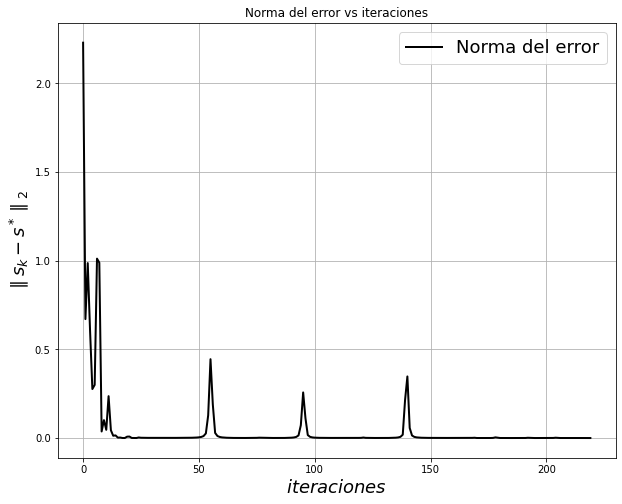

In [ ]:
iters = np.arange(len(iterationes))

fig = plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(iters, norm_dif, "k-", lw=2, label="Norma del error")
plt.xlabel(r"$iteraciones$", fontsize=18)
plt.ylabel(r"$\parallel s_k - s^* \parallel_2$", fontsize=18)
# plt.xlim(-5, 240)
# plt.ylim(-0.3, 2.5)
plt.legend(loc=1, fontsize=18)
plt.title("Norma del error vs iteraciones")
plt.show()
plt.close()

El problema de convergencia del método radica en que la matriz no es ni simétrica ni definida positiva. Sus valores propios son $\lambda_1 = -1$ y $\lambda_2 = 7$. Si no son todos positivos no se cumple la condición de definida positiva. 

Veamos que ocurre si los:

In [ ]:
A = np.array([[3, 1, 0], [1, 3, 1], [0, 1, 3]])
A

array([[3, 1, 0],
       [1, 3, 1],
       [0, 1, 3]])

In [ ]:
b = np.array([4.0, 5.0, 4.0])
b

array([4., 5., 4.])

Sus valores propios esta vez son todos positivos: $ \lambda_1 = 1.58578644$, $ \lambda_2 = 3$ y $ \lambda_3 = 4.41421356$.

In [ ]:
s = np.array([1.0, 1.0, 1.0])

# Almacenar resultado por iteración
iterationes = []
# Almacenar el error en cada interación
norm_dif = []

In [ ]:
splin.cg(A, b, maxiter=1000, tol=1e-6, callback=delegate)

(array([1., 1., 1.]), 0)

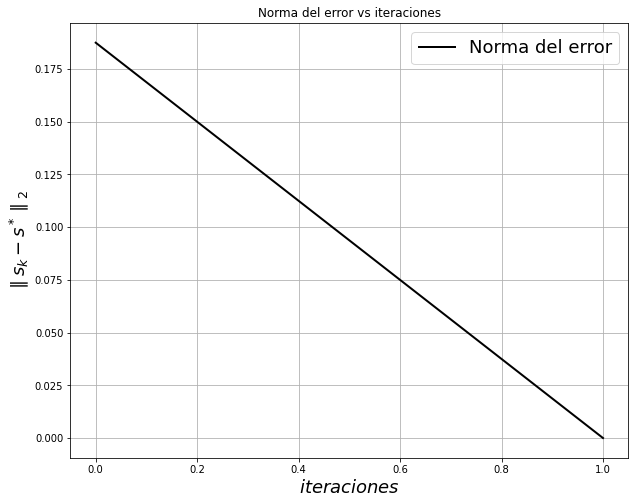

In [ ]:
iters = np.arange(len(iterationes))

fig = plt.figure(figsize=(10, 8))
plt.grid()
plt.plot(iters, norm_dif, "k-", lw=2, label="Norma del error")
plt.xlabel(r"$iteraciones$", fontsize=18)
plt.ylabel(r"$\parallel s_k - s^* \parallel_2$", fontsize=18)
# plt.xlim(-5, 240)
# plt.ylim(-0.3, 2.5)
plt.legend(loc=1, fontsize=18)
plt.title("Norma del error vs iteraciones")
plt.show()
plt.close()

También existen implementaciones de los métodos iterativos usuales:

In [ ]:
splin.cgs(A, b, maxiter=1000, tol=1e-6)

(array([1., 1., 1.]), 0)

In [ ]:
splin.bicg(A, b, maxiter=1000, tol=1e-6)

(array([1., 1., 1.]), 0)

In [ ]:
splin.gmres(A, b, maxiter=1000, tol=1e-6)

(array([1., 1., 1.]), 0)

#### Análisis de sensibilidad
Sea el siguiente sistema:

$\begin{bmatrix}
1 & \sqrt{p}\\
1 & \frac{1}{\sqrt{p}}
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2
\end{bmatrix} = 
\begin{bmatrix}
1\\
2
\end{bmatrix}$

In [ ]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1 / sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
A

⎡1  √p⎤
⎢     ⎥
⎢   1 ⎥
⎢1  ──⎥
⎣   √p⎦

In [ ]:
x = A.solve(b)
x

⎡2⋅p - 1 ⎤
⎢─────── ⎥
⎢ p - 1  ⎥
⎢        ⎥
⎢   1    ⎥
⎢────────⎥
⎢      1 ⎥
⎢-√p + ──⎥
⎣      √p⎦

El problema es que en la medida que $p$ se aproxime al valor $1$ entonces la matriz $A$ se vuelve singular. Esto hace que $A$ sea una matriz *mal condicionada*.

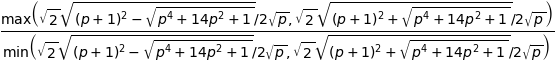

In [ ]:
A_cond = A.condition_number().simplify()
A_cond

In [ ]:
A_cond.subs(p, 1)

In [ ]:
A_cond.subs(p, 1 + 1e-10)

In [ ]:
A_cond.subs(p, 1.5)

Hagamos un análisis numérico del problema. El siguiente código resolverá el sistema para un valor dado de $p$.

In [ ]:
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1 / np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

In [ ]:
x_sym_sol = x

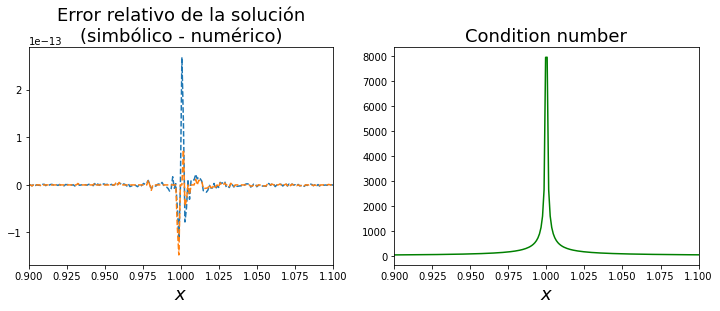

In [ ]:
# Valores de prueba
p_vec = np.linspace(0.9, 1.1, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Calcular error relativo
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])

    axes[0].plot(p_vec, (x_num - x_sym) / x_sym, "--")

axes[0].set_title("Error relativo de la solución\n(simbólico - numérico)", fontsize=18)
axes[0].set_xlabel("$x$", fontsize=18)
axes[0].set_xlim(0.9, 1.10)

# Condición de la matriz
axes[1].plot(p_vec, [A_cond.subs(p, pp).evalf() for pp in p_vec], "-g")
axes[1].set_title("Condition number", fontsize=18)
axes[1].set_xlabel("$x$", fontsize=18)
axes[1].set_xlim(0.9, 1.10)

plt.show()
plt.close()

### Sistemas de ecuaciones rectangulares

In [ ]:
x_vars = sympy.symbols("x_1, x_2, x_3")
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])

In [ ]:
A

⎡1  2  3⎤
⎢       ⎥
⎣4  5  6⎦

In [ ]:
b

⎡7⎤
⎢ ⎥
⎣8⎦

In [ ]:
x

⎡x₁⎤
⎢  ⎥
⎢x₂⎥
⎢  ⎥
⎣x₃⎦

In [ ]:
sympy.solve(A * x - b, x_vars)

### Problemas de valores y vectores propios

El problema de los valores y vectores propios se refiere a la solución del problema $A\vec{v} = \lambda \vec{v}$. 

Referencia documental: 
Implementación en scipy https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html

Implementación en numpy: https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

Por supuesto que pudiera pensarse en diagonalizar la matriz para simplificar el problema pero esto *cambia los valores propios* cosa que no es deseable.

En su lugar se reagrupan los terminos para tener 

$(A - \lambda I) \vec{v} = 0$

lo cual permite un mejor análisis. Obviando la solución trivial $\vec{v} = 0$ entonces nos enfocamos en el determinado por el polinómio característico:

$det(A - \lambda I)=0$.

Las raíces de este polinomio permiten conocer los valores propios $\lambda$ y a partir de ellos los espacios de vectores propios asociados que conforman el espacio nulo de la matriz resultante

$(A - \lambda I) \vec{v} = 0$.

En el módulo ```linalg``` de ```scipy``` se encuentran algunas funciones que permiten calcular los vectores y valores propios de forma eficiente (usando rutinas implementadas en la biblioteca ```LAPACK``` de FORTRAN).

función                      | Descripción
-----------------------------|--------------------------------------
```scipy.linalg.eigvals```   | Calcula los valores propios de un problema ordinario o generalizado (ver ejemplos debajo) de valores propios.
```scipy.linalg.eig```       | Calcula los valores propios como el anterior pero también brinda los vectores propios asociados (contiguos si vienen en pares).
```scipy.linalg.eigh```      | Realiza la misma función que el anterior pero con la particularidad de que está optimizado para matrices simétricas. La implementación en ```LAPACK``` utiliza una descomposición $QR$.
```scipy.linalg.eigh_tridiagonal``` |  Resuelve el problema para matrices simétricas tri-diagonales (interesante en el área de las ecuaciones diferenciales en derivadas parciales).

**Demo #1:** Veamos un ejemplo de un problema ordinario donde se tiene una matriz $A=\begin{bmatrix}
0 & -1\\
1 & 0
\end{bmatrix}$.


In [ ]:
A = np.array([[0.0, -1.0], [1.0, 0.0]])
print("Valores propios ", la.eigvals(A))

Valores propios  [0.+1.j 0.-1.j]


Al calcular los valores propios, estos son números complejos. 

*Como posible aplicación se puede decir que sus vectores propios asociados definen transformaciones rotatorias en el espacio.*

**Demo #2:** Si calculamos un problema general donde definimos otra transformación lineal $B = \begin{bmatrix}
0 & 1 \\
1 & 1 
\end{bmatrix}$ entonces se tiene el siguiente problema

$ A\vec{v} = \lambda B\vec{v} $,

$(A-\lambda B)\vec{v} = 0$.
En el siguiente ejemplo se muestra como resolver este problema.

In [ ]:
B = np.array([[0.0, 1.0], [1.0, 1.0]])
print("Valores propios ", la.eigvals(A, B))

Valores propios  [ 1.+0.j -1.+0.j]


En este caso los valores propios son  números reales.

**Demo #3:** Supongamos ahora que queremos calcular además los vectores propios asociados. Entonces podemos utilizar la función general ```scipy.linalg.eig```:

In [ ]:
A2 = np.array([[1, -1], [2, 4]])

# Calculando valores y vectores propios
e = la.eig(A2)

print("Valores propios:", e[0])
print("Vectores propios normalizados:\n", e[1] / la.norm(e[1]))

Valores propios: [2.+0.j 3.+0.j]
Vectores propios normalizados:
 [[-0.5         0.31622777]
 [ 0.5        -0.63245553]]


En este acaso se devuelve un array con dos elementos ```[valores propios, vectores propios]```. 

En el caso anterior el polinomio característico queda 

$\lambda^2 - 5 \lambda + 6 = 0$ 

con soluciones $\lambda_1 = 3$ y $\lambda_2 = 2$.

Si se calculan analíticamente los espacios de vectores propios se obtiene 

$\vec{v}_{\lambda_1} = 
\begin{bmatrix}
-\frac{1}{2} \\
\frac{1}{2}
\end{bmatrix}$ y 
$\vec{v}_{\lambda_2} = 
\begin{bmatrix}
\frac{1}{3} \\
-\frac{2}{3}
\end{bmatrix}$.

Es importante notar que la función ```scipy.linalg.eig``` tiene los parámetros ```left``` y ```right```. Esto significa que

*   Si ```left=True``` entonces la matriz de vectores propios $S$ dada será de acuerdo a $A = S \mathcal{Λ} S^{-1}$.
*   Si ```right=True``` entonces la matriz de vectores propios $S$ dada será de acuerdo a $A = S^{-1} \mathcal{Λ} S$.

La diferencia que se muestra en el segundo vector está dada por aproximaciones numéricas.

## Ejercicios

### Ejercicio #1: Resolviendo sistema de ecuaciones con descomposición LU.

Dado el siguiente sistema de ecuaciones 

$
\begin{bmatrix}
 1 & 4 & 5 \\
 6 & 8 & 22\\
32 & 5 & 5
\end{bmatrix} x = \begin{bmatrix}
1\\
2\\
3
\end{bmatrix}
$:


In [ ]:
# Creando matriz A
A = np.array([[1, 4, 5], [6, 8, 22], [32, 5, 5]], dtype=np.float64)
# Creando vector b
b = np.array([1, 2, 3])

Descompóngalo en las matrices P, L y U e imprímalas:

In [ ]:
# Calculando la descomposición LU
P, L, U = la.lu(A)

print("P =\n", P)
print("L =\n", L)
print("U =\n", U)

P =
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
L =
 [[1.         0.         0.        ]
 [0.1875     1.         0.        ]
 [0.03125    0.54424779 1.        ]]
U =
 [[32.          5.          5.        ]
 [ 0.          7.0625     21.0625    ]
 [ 0.          0.         -6.61946903]]


¿Es A "igual" a LU(A)? Utilice la función ```np.allclose``` para ello o la norma de la diferencia entre matrices con una tolerancia de ```ϵ=1e-10```.

In [ ]:
print("¿Es A 'igual' a LU(A)?", np.allclose(A, P @ L @ U))
print("También ||A - PLU(A)|| =", la.norm(A - P @ L @ U) < 1e-10)

¿Es A 'igual' a LU(A)? True
También ||A - PLU(A)|| = True


Calcule el determinante de la matriz A usando la función ```la.det```.

In [ ]:
la.det(A)

Calcule ahora el determinante de la matriz $A$ utilizando la descomposición $ LU$ de $A$ sin usar la función ```det```. Recuerde que el determinante de una matriz es igual a la multiplicación de los determinantes de su descomposición. Tenga en cuenta también las permutaciones contenidas en la matriz $P$. 

In [ ]:
detL = 1.0
detU = np.prod(np.diagonal(U))
swaps = (np.diagonal(P).size - np.sum(np.diagonal(P))) - 1
detP = np.power(-1, swaps)

print("Determinante de A =", detP * detL * detU)

Determinante de A = 1495.9999999999998


### Ejercicio #2: Calculando inversa de la matriz A utilizando la descomposición $LU$.

Para calcular la matriz inversa de $A$ seguiremos el algoritmo basado en la propiedad

$A A^{-1} = I$ donde 

$
A = \begin{bmatrix}
a_{00}      &  \dots  &  a_{0 n}       \\
\vdots &  \ddots &  \vdots  \\
a_{n 0}      &  \dots  &  a_{nn}  
\end{bmatrix}
$ y $ A^{-1} = \begin{bmatrix}
\sigma_{00}      &  \dots  &  \sigma_{0 n}       \\
\vdots &  \ddots &  \vdots  \\
\sigma_{n 0}      &  \dots  &  \sigma_{nn}  
\end{bmatrix}
$, la cual cumple que

$
\begin{bmatrix}
a_{00}      &  \dots  &  a_{0 n}       \\
\vdots &  \ddots &  \vdots  \\
a_{n 0}      &  \dots  &  a_{nn}  
\end{bmatrix}
\begin{bmatrix}
\sigma_{0 j}  \\
\vdots        \\
\sigma_{n, j} \\
\end{bmatrix} = 
I_j \, j = 0, \dots, n
$ 

donde $I_j$ es la columna j-ésima de la matriz identidad.

Y para ello vamos a aprovechar los beneficios que nos brinda la descomposición $LU$ de la siguiente forma:

Primero que todo descompongamos $A$ en las matrices $PA = L U$. Entonces la columna j-ésima de la matriz inversa se calcula resolviendo el siguiente sistema

$L U 
\begin{bmatrix}
\sigma_{0 j}  \\
\vdots        \\
\sigma_{n, j} \\
\end{bmatrix} = P I_j
$.

Calcule las columnas de la matriz $A^{-1}$ implementando los siguientes algoritmos de "sustitución hacia adelante" y "sustitución hacia atrás":

**Sustitución hacia adelante:**

$\quad  y_i = \frac{\left(I_{ij} - \sum_{j=0}^{i-1} l_{i j} y_j\right)}{l_{ii}}$ para $ i = 0, 1, \dots, n$

In [ ]:
def forward_substitution(L, Pb):
    # Inicializar la variable y que es igual a Ux.
    y = np.zeros_like(Pb, dtype=np.double)

    # Por cada fila despejar todas las variables y coeficientes que
    # estén situados delante de la diagonal (que tiene valor 1)
    # hacia el miembro derecho y dividirlo por el coeficiente de la
    # diagonal que es 1. HINT: Para ello utilice el producto interno.
    for i in range(0, L.shape[0]):
        y[i] = Pb[i] - np.dot(L[i, :i], y[:i])

    return y

**Sustitución hacia atrás:**

$A^{-1}_{ij}= \frac{\left(y_{i} - \sum_{k=i+1}^{n} u_{i k} A^{-1}_{ik}\right)}{u_{ii}}$

donde el índice $j$ se refiere a la columna j-ésima de la matriz $A^{-1}_{ij}$ y el índice $k$ es utilizado por el algoritmo para referirse a las columnas de $U$.

In [ ]:
def back_substitution(U, y):
    # Iniciar la variable x con zeros del mismo tamaño que y
    x = np.zeros_like(y, dtype=np.double)

    # Por cada fila en orden inverso, se despejan las variables y
    # coeficientes que estén situados detrás de la diagonal.
    # Dividir por el valor del elemento en la diagonal.
    # HINT: Usar el producto interno.
    for i in range(U.shape[0] - 1, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i:], x[i:])) / U[i, i]

    return x

Calculando la inversa de la forma:

$LU A^{-1}_{j} = P I_{j}$

para lo cual hacemos la sustitución 

$U A^{-1}_{j} = y_{j}$ y quedaría

$L y_{j} = P I_{j}$ que pudiera ser resulto con el algoritmo de sustitución hacia adelante.

Luego, sustituimos el valor de $y_j$ en la ecuación anterior resolviendo

$U A^{-1}_{j} = y_{j}$

utilizando el algoritmo de sustitución hacia atrás obteniendo la columna $A^{-1}_{j}$ de la matriz inversa de A.

Implemente este algoritmo.

In [ ]:
# Crear matriz identidad
I = np.identity(A.shape[0])

# Crear matriz inversa resultante inicialmente vacía
A_1 = np.empty_like(I)

# Iterar por las columnas de la matriz A_1
for j in range(A_1.shape[1]):
    # Hacer sustitución hacia adelante (L y = P I_j)
    y = forward_substitution(L, P @ I[:, j])
    # Hacer sustitución hacia atrás (U x = y)
    x = back_substitution(U, y)
    # Reemplazar columna de la matriz inversa
    A_1[:, j] = x

# Calcular inversa de A usando la función del módulo scipy.linalg para comprobación
Ap_1 = la.inv(A)

# Imprimir los resultados
print("A_-1 =\n", A_1)
print("inv(A) =\n", Ap_1)
# Comparar los resultados
print("A_-1 == inv(A)?", np.allclose(A_1, Ap_1))

A_-1 =
 [[-0.04679144  0.00334225  0.03208556]
 [ 0.45053476 -0.10360963  0.00534759]
 [-0.15106952  0.08221925 -0.01069519]]
inv(A) =
 [[-0.04679144  0.00334225  0.03208556]
 [ 0.45053476 -0.10360963  0.00534759]
 [-0.15106952  0.08221925 -0.01069519]]
A_-1 == inv(A)? True
